In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.optimize import curve_fit
import pickle

In [44]:
def exp_func(x, a, b, c, d):
    return a * np.exp(b * (x-c)) + d

In [47]:
with open('beams/Beams48.pkl', 'rb') as file:
    beams = pickle.load(file)
beamMap = []
for beam in beams:
    beamMap.append((float(beam["Az"]), beam["El"]))

In [9]:
# directoryname = "AGC_test/082625_AGCtest_1dB/"
# filenames = ["20250910_surfscan_0.csv",
#              "20250910_surfscan_1.csv",
#              "20250910_surfscan_2.csv"]
# filenames = ["48beams_20250915.csv",
#              "48beams_20250915_2.csv",
#              "48beams_20250915_3.csv"]

# filenames = ["20250910_surfscan_0.csv",
#              "20250910_surfscan_1.csv",
#              "20250910_surfscan_2.csv"]
filenames_48scan = ["20250916_48Beams_0.csv",
                    "20250916_48Beams_1.csv"]

filenames_gridScan = [  "20250917_BeamScan_300hz_-22_-16.csv",
                        "20250917_BeamScan_300hz_-22_-10.csv",
                        "20250917_BeamScan_300hz_-22_-5.csv",
                        "20250917_BeamScan_300hz_-22_0.csv",
                        "20250917_BeamScan_300hz_-1_-16.csv",
                        "20250917_BeamScan_300hz_-1_-10.csv",
                        "20250917_BeamScan_300hz_-1_-5.csv",
                        "20250917_BeamScan_300hz_-1_0.csv",
                        "20250917_BeamScan_300hz_19_-16.csv",
                        "20250917_BeamScan_300hz_19_-10.csv",
                        "20250917_BeamScan_300hz_19_-5.csv",
                        "20250917_BeamScan_300hz_19_0.csv",
                        "20250917_BeamScan_300hz_40_-16.csv",
                        "20250917_BeamScan_300hz_40_-10.csv",
                        "20250917_BeamScan_300hz_40_-5.csv",
                        "20250917_BeamScan_300hz_40_0.csv",
                        "20250917_BeamScan_300hz_2_-20.csv",
                        "20250917_BeamScan_300hz_2_4.csv"]



In [28]:

def readBeamScan_300hzs(filenames):

    thresholds = {}
    beam_scalers = {}
    surf_scalers = {}

    for filename in filenames:
        with open(filename, 'r') as infile:
            first=True
            for line in infile:
                if(first):
                    first=False
                    continue
                parsed_line = line.strip().split(",")
                if(parsed_line[0] == "beam"):
                    tio = int(parsed_line[1])
                    slot = int(parsed_line[2])
                    beam = int(parsed_line[3])
                    threshold = int(parsed_line[4])
                    scaler = float(parsed_line[5])
                elif(parsed_line[0]== "trig"):
                    tio = int(parsed_line[1])
                    slot = int(parsed_line[2])
                    threshold = int(parsed_line[3])
                    scaler = float(parsed_line[4])
                else:
                    raise Exception("Unrecognized type")
                
                if(not slot in thresholds.keys()):
                    thresholds[slot] = {}
                    thresholds[slot]["surf"] = []
                    beam_scalers[slot] = {}
                    surf_scalers[slot] = []
                if(parsed_line[0] == "beam"):
                    if(not beam in beam_scalers[slot].keys()):
                        thresholds[slot][beam] = []
                        beam_scalers[slot][beam] = []
                    thresholds[slot][beam].append(int(threshold))
                    beam_scalers[slot][beam].append(float(scaler))
                else:
                    surf_scalers[slot].append(float(scaler))
                    thresholds[slot]["surf"].append(int(threshold))
    return thresholds, beam_scalers, surf_scalers


# Grid Scans

In [41]:
# thresholds, beam_scalers, surf_scalers = readBeamScan_300hzs([filenames_gridScan[1]])
thresholds, beam_scalers, surf_scalers = readBeamScan_300hzs(["20250917_BeamScan_300hz_40_-16.csv"])

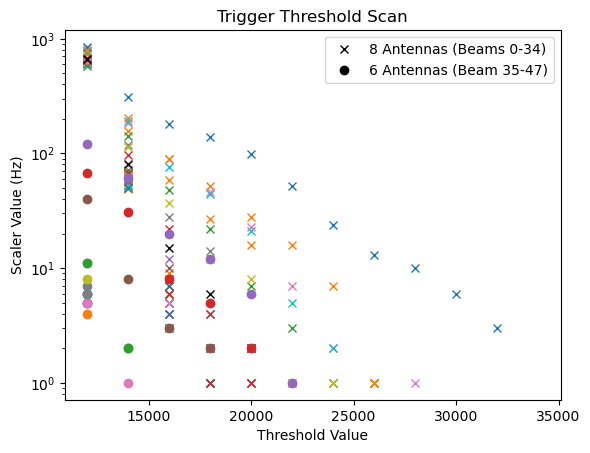

[12000 14000 16000 18000 20000 22000 24000 26000 28000 30000 32000 34000]


In [42]:
for idx in range(48):
    x = np.array(thresholds[5][idx])
    y = np.array(beam_scalers[5][idx])
    sort_idx = np.argsort(x)
    if(idx < 34):
        plt.plot(x[sort_idx], y[sort_idx], linestyle="none", marker="x", color=f'C{idx}')
    elif(idx==34):
        plt.plot(x[sort_idx], y[sort_idx], linestyle="none", marker="x", color=f'k', label=f"8 Antennas (Beams 0-34)")    
    elif(idx==35):
        plt.plot(x[sort_idx], y[sort_idx], linestyle="none", marker="o", color=f'k', label=f"6 Antennas (Beam 35-47)")
    else:
        plt.plot(x[sort_idx], y[sort_idx], linestyle="none", marker="o", color=f'C{idx}',)
plt.title("Trigger Threshold Scan")
plt.xlabel("Threshold Value")
plt.ylabel("Scaler Value (Hz)")
plt.yscale("log")
plt.legend()
plt.show()
print(x)

20250917_BeamScan_300hz_-22_-16.csv
22000
	(-2.70, -15.09)
	(8.20, -14.86)
[30, 31]
20250917_BeamScan_300hz_-1_-16.csv
22000
	(8.20, -14.86)
	(17.21, -15.74)
	(28.00, -16.54)
[31, 32, 33]
20250917_BeamScan_300hz_19_-16.csv
22000
	(37.19, -16.84)
[34]
20250917_BeamScan_300hz_40_-16.csv
22000
[]
20250917_BeamScan_300hz_-22_-10.csv
22000
	(-2.49, -8.09)
	(7.86, -7.88)
[16, 17]
20250917_BeamScan_300hz_-1_-10.csv
22000
	(16.45, -8.69)
[18]
20250917_BeamScan_300hz_19_-10.csv
22000
	(27.39, -8.09)
	(37.40, -7.15)
[19, 20]
20250917_BeamScan_300hz_40_-10.csv
22000
[]
20250917_BeamScan_300hz_-22_-5.csv
22000
	(-1.87, -4.20)
	(8.51, -4.01)
[9, 10]
20250917_BeamScan_300hz_-1_-5.csv
22000
	(8.51, -4.01)
	(17.09, -4.83)
	(28.06, -4.28)
[10, 11, 12]
20250917_BeamScan_300hz_19_-5.csv
22000
	(38.12, -3.40)
[13]
20250917_BeamScan_300hz_40_-5.csv
22000
[]
20250917_BeamScan_300hz_-22_0.csv
22000
	(-11.46, -1.43)
	(-1.27, -0.82)
	(7.70, 0.05)
[1, 2, 3]
20250917_BeamScan_300hz_-1_0.csv
22000
	(16.21, -0.72)

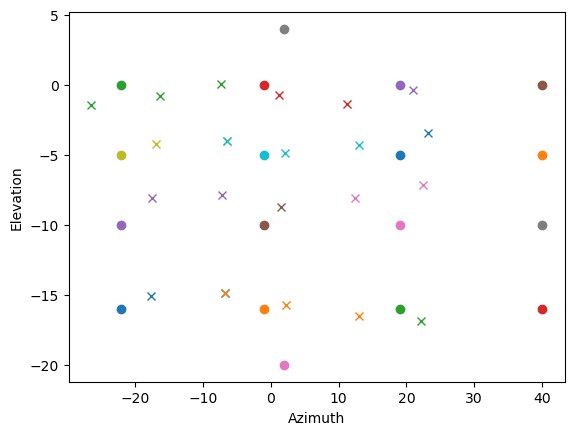

In [61]:
positions = [(-22,-16), (-1,-16), (19,-16), (40,-16), (-22,-10), (-1,-10), (19,-10), (40,-10), (-22,-5), (-1,-5), (19,-5), (40,-5), (-22,0), (-1,0), (19,0), (40,0), (2,-20), (2,4)]
offset=-15
plot_points = []
for az, el in positions:
    plot_points.append([(az,el),[],[]])
    print(f"20250917_BeamScan_300hz_{az:d}_{el:d}.csv")
    thresholds, beam_scalers, surf_scalers = readBeamScan_300hzs([f"20250917_BeamScan_300hz_{az:d}_{el:d}.csv"])
    print(np.array(thresholds[5][0][5], dtype=np.int64))
    hit_beams = []
    for beam_idx in range(48):
        if(beam_scalers[5][beam_idx][5] > 200):
            hit_beams.append(beam_idx)
    for hit in hit_beams:
        print(f"\t({beamMap[hit][0]:0.2f}, {beamMap[hit][1]:0.2f})")
        plot_points[-1][1].append(beamMap[hit][0]+offset)
        plot_points[-1][2].append(beamMap[hit][1])
    print(hit_beams)
for idx in range(len(positions)):
    print(plot_points[idx][0])
    plt.plot([plot_points[idx][0][0]], [plot_points[idx][0][1]], color=f"C{idx}", linestyle="None", marker="o")
    plt.plot(plot_points[idx][1], plot_points[idx][2], color=f"C{idx}", linestyle="None", marker="x")
plt.xlabel("Azimuth")
plt.ylabel("Elevation")
plt.show()

## Noise Scans

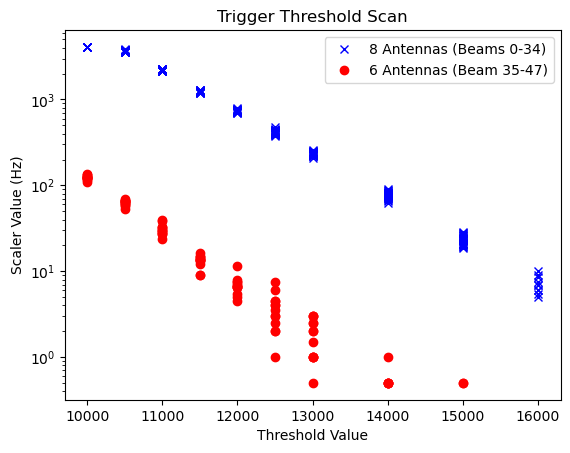

In [18]:
for idx in range(48):
    x = np.array(thresholds[4][idx])
    y = np.array(beam_scalers[4][idx])
    sort_idx = np.argsort(x)
    if(idx < 34):
        plt.plot(x[sort_idx], y[sort_idx], linestyle="none", marker="x", color='b')
    elif(idx==34):
        plt.plot(x[sort_idx], y[sort_idx], linestyle="none", marker="x", color='b', label=f"8 Antennas (Beams 0-34)")    
    elif(idx==35):
        plt.plot(x[sort_idx], y[sort_idx], linestyle="none", marker="o", color='r', label=f"6 Antennas (Beam 35-47)")
    else:
        plt.plot(x[sort_idx], y[sort_idx], linestyle="none", marker="o", color='r',)
plt.title("Trigger Threshold Scan")
plt.xlabel("Threshold Value")
plt.ylabel("Scaler Value (Hz)")
plt.yscale("log")
plt.legend()
plt.show()

In [24]:
print(x)
for idx in range(48):
    if(beam_scalers[4][idx][3]>1000):
        print(idx)

[10500 11500 12500 13500 19500 15500 16500]
35
36
37
38
39
40
41
42
43
44
45
46
47


## Plotting Tests

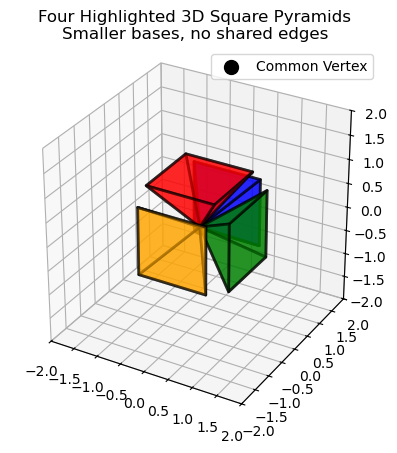

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Common vertex
vertex = np.array([0, 0, 0])

# Each pyramid has a square base, but the bases are smaller and do not touch
base_size = 0.7  # Smaller base

# Pyramid 1: base in xy plane, vertex at origin, base at z=1
base1 = np.array([
    [base_size, base_size, 1],
    [-base_size, base_size, 1],
    [-base_size, -base_size, 1],
    [base_size, -base_size, 1]
])
faces1 = [list(base1), [vertex, base1[0], base1[1]], [vertex, base1[1], base1[2]], [vertex, base1[2], base1[3]], [vertex, base1[3], base1[0]]]

# Pyramid 2: base in yz plane, vertex at origin, base at x=1
base2 = np.array([
    [1, base_size, base_size],
    [1, -base_size, base_size],
    [1, -base_size, -base_size],
    [1, base_size, -base_size]
])
faces2 = [list(base2), [vertex, base2[0], base2[1]], [vertex, base2[1], base2[2]], [vertex, base2[2], base2[3]], [vertex, base2[3], base2[0]]]

# Pyramid 3: base in xz plane, vertex at origin, base at y=1
base3 = np.array([
    [base_size, 1, base_size],
    [-base_size, 1, base_size],
    [-base_size, 1, -base_size],
    [base_size, 1, -base_size]
])
faces3 = [list(base3), [vertex, base3[0], base3[1]], [vertex, base3[1], base3[2]], [vertex, base3[2], base3[3]], [vertex, base3[3], base3[0]]]

# Pyramid 4: base in xz plane, vertex at origin, base at y=-1
base4 = np.array([
    [base_size, -1, base_size],
    [-base_size, -1, base_size],
    [-base_size, -1, -base_size],
    [base_size, -1, -base_size]
])
faces4 = [list(base4), [vertex, base4[0], base4[1]], [vertex, base4[1], base4[2]], [vertex, base4[2], base4[3]], [vertex, base4[3], base4[0]]]

# Plot each pyramid with a different color and highlight
colors = ['red', 'green', 'blue', 'orange']
for faces, color in zip([faces1, faces2, faces3, faces4], colors):
    poly3d = Poly3DCollection(faces, alpha=0.6, facecolor=color, edgecolor='k', linewidths=2)
    ax.add_collection3d(poly3d)

ax.scatter(*vertex, color='black', s=100, label='Common Vertex')
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
ax.set_box_aspect([1,1,1])
ax.set_title("Four Highlighted 3D Square Pyramids\nSmaller bases, no shared edges")
plt.legend()
plt.show()

## Saved

C:\Users\beaufore.2la\AppData\Local\Temp\ipykernel_12580\4235799877.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.exp(b * (x-c)) + d


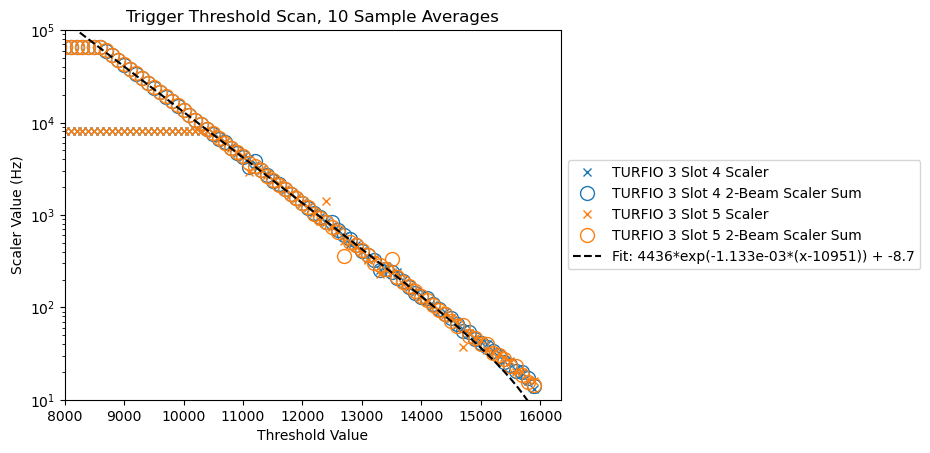

In [47]:
FIT=True
FIT_TYPE="SURF"
BEAMS=False
all_beam_threshs = np.array([])
all_beam_scalers = np.array([])
all_surf_threshs = np.array([])
all_surf_scalers = np.array([])
sum_beams = {}
for slot, beam, label in [(4, 0, "SURF Slot 4, Beam 0"),
                          (4, 1, "SURF Slot 4, Beam 1"),
                          (5, 0, "SURF Slot 5, Beam 0"),
                          (5, 1, "SURF Slot 5, Beam 1")]:
    x = np.array(thresholds[slot][beam])
    y = np.array(beam_scalers[slot][beam])
    all_beam_threshs = np.concat((all_beam_threshs,x))
    all_beam_scalers = np.concat((all_beam_scalers,y))
    # Only fit where y > 0 to avoid log issues
    mask = (y > 0)
    if BEAMS:
        plt.plot(x[mask], y[mask], linestyle="None", marker=".", label=label)

for slot, beam, label in [(4, 0, "SURF Slot 4, Beam 0"),
                          (4, 1, "SURF Slot 4, Beam 1"),
                          (5, 0, "SURF Slot 5, Beam 0"),
                          (5, 1, "SURF Slot 5, Beam 1")]:
    if not slot in sum_beams.keys():
        sum_beams[slot] = np.zeros(len(thresholds[slot]["surf"]))
    sum_beams[slot] = sum_beams[slot] + np.array(beam_scalers[slot][beam])

for slot, label in [(4, "TURFIO 3 Slot 4"),
                    (5, "TURFIO 3 Slot 5")]:
    x = np.array(thresholds[slot][beam])
    y = np.array(sum_beams[slot])
    mask = (y > 0) & (x > 7000) & (x < 16500)
    plt.plot(x[mask], y[mask], linestyle="None", marker="x", color=f"C{(slot-4)}", markersize=6, label=f"{label} Scaler")
    
    x = np.array(thresholds[slot]["surf"])
    y = np.array(surf_scalers[slot])
    plt.plot(x[mask], y[mask], linestyle="None", marker="o", color=f"C{(slot-4)}", markersize=10,  mfc="none", label=f"{label} 2-Beam Scaler Sum")
    all_surf_threshs = np.concat((all_surf_threshs,x))
    all_surf_scalers = np.concat((all_surf_scalers,y))

if(FIT_TYPE=="SURF"):
    x = np.array(all_surf_threshs)
    y = np.array(all_surf_scalers)
else:
    x = np.array(all_beam_threshs)
    y = np.array(all_beam_scalers)
# Only fit where y > 0 to avoid log issues
mask = (y > 0) & (x > 11000) & (x < 16500)
if FIT:
    popt, _ = curve_fit(exp_func, x[mask], y[mask], p0=(1000, -0.001, 10000, 0))
    plt.plot(thresholds[slot][beam], exp_func(thresholds[slot][beam], *popt), linestyle='--', color='k', label=f"Fit: {popt[0]:0.0f}*exp({popt[1]:0.3e}*(x-{popt[2]:0.0f})) + {popt[3]:0.1f}")


# print(x[mask][0])
# plt.xlim(8000, 17500)
plt.xlim(xmin=8000)
plt.ylim(10**1,10**5)
plt.yscale("log")
plt.title("Trigger Threshold Scan, 10 Sample Averages")
plt.xlabel("Threshold Value")
plt.ylabel("Scaler Value (Hz)")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Legend outside right
plt.savefig("threshold_scan_20250910_draft0.png",  bbox_inches='tight')
plt.show()

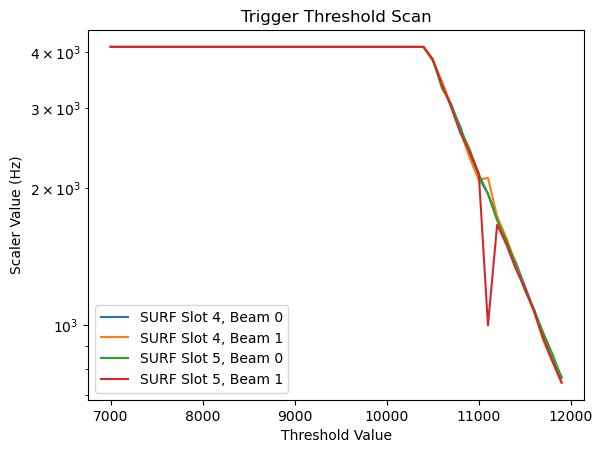

In [9]:
plt.plot(thresholds[4][0], beam_scalers[4][0],label="SURF Slot 4, Beam 0")
plt.plot(thresholds[4][1], beam_scalers[4][1],label="SURF Slot 4, Beam 1")
plt.plot(thresholds[5][0], beam_scalers[5][0],label="SURF Slot 5, Beam 0")
plt.plot(thresholds[5][1], beam_scalers[5][1],label="SURF Slot 5, Beam 1")
plt.title("Trigger Threshold Scan")
plt.xlabel("Threshold Value")
plt.ylabel("Scaler Value (Hz)")
plt.yscale("log")
plt.legend()
# plt.savefig("threshold_scan_20250902_fine2.png")
plt.show()

In [ ]:
dB_value = 10
event_value = 0
surf_value = 25
channel_value = 0
plt.plot((1/3)*np.arange(len(all_data[dB_value][event_value][surf_value][channel_value])),all_data[dB_value][event_value][surf_value][channel_value])
plt.title(f"{dB_value}dB of Attenuation CW on SURF {surf_value} Channel {channel_value}\n Event {event_value}")
plt.xlabel("Time (ns)")
plt.ylabel("ADC Value")
plt.xlim(0,100)
plt.show()

In [ ]:
event_value = 0
surf_value = 25
channel_value = 0
for dB_value in range(0,15,5):
    plt.plot((1/3)*np.arange(len(all_data[dB_value][event_value][surf_value][channel_value])),all_data[dB_value][event_value][surf_value][channel_value], label = f"{dB_value} of attenuation")
plt.title(f"CW on SURF {surf_value} Channel {channel_value}\n Event {event_value}")
plt.xlabel("Time (ns)")
plt.ylabel("ADC Value")
plt.legend()
plt.xlim(0,20)
plt.show()

In [ ]:
event_value = 0
surf_value = 25
channel_value = 0
dB_value = 40
P_noise = np.sqrt(np.mean(all_data[dB_value][event_value][surf_value][channel_value] ** 2))*(np.sqrt(2))

In [ ]:
surf_value = 25
P_signals = []
all_snrs = []
mean_snrs = []
for dB_value in range(41):
    all_snrs.append([])
    for event_idx in range(10):
        P_signal = np.sqrt(np.mean(all_data[dB_value][event_idx][surf_value][channel_value] ** 2))*(np.sqrt(2))
        P_signals.append(P_signal)
        all_snrs[-1].append((P_signal-P_noise)/P_noise)
for idx in range(41):
    mean_snrs.append(np.mean(all_snrs[idx]))

In [ ]:
plt.plot(mean_snrs)
plt.title(f"CW on SURF {surf_value} Channel {channel_value}")
plt.xlabel("dB of attenuation on CW")
plt.ylabel("SNR")

In [ ]:
event_value = 0
surf_value = 25
channel_value = 0
dB_value = 0

yf = fft(all_data[dB_value][event_value][surf_value][channel_value])
N = len(all_data[dB_value][event_value][surf_value][channel_value])
xf = fftfreq(N, (1/(3e9)))[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), linestyle="None", marker=".")
max_idx = np.argmax(np.abs(yf[0:N//2]))
print(max_idx)
print(xf[max_idx]/(1e6))
print(2*np.abs(yf[max_idx]/N))
print(np.sum(np.abs(yf[0:N//2])))
print(np.sum(2.0/N * np.abs(yf[0:N//2])))

print("******")
s = (2/N)*(np.abs(yf[max_idx]**2) + np.abs(yf[max_idx-1]**2) + np.abs(yf[max_idx+1]**2))
noise = (2/N)*(np.sum(np.abs(yf[:max_idx-1])**2) + np.sum(np.abs(yf[max_idx+2:]**2)))
print(s/noise)

In [ ]:
agc_pickles = []
for dB_idx in range(41):
    with open(f"AGC_test/082625_AGCtest_{dB_idx:d}dB/jjbAGC.pkl", 'rb') as file:
        agc_pickles.append(pickle.load(file))

In [ ]:
# Note: Index 0 is just the index of the trial

chan = 0
sqs = {}
for dB_idx in range(41):
    sqs[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        sqs[dB_idx].append(agc_pickles[dB_idx][i][chan][1])
        
gts = {}
for dB_idx in range(41):
    gts[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        gts[dB_idx].append(agc_pickles[dB_idx][i][chan][2])
        
lts = {}
for dB_idx in range(41):
    lts[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        lts[dB_idx].append(agc_pickles[dB_idx][i][chan][3])

scales = {}
for dB_idx in range(41):
    scales[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        scales[dB_idx].append(agc_pickles[dB_idx][i][chan][4]) 
        
offsets = {}
for dB_idx in range(41):
    offsets[dB_idx] = []
    for i in range(len(agc_pickles[dB_idx])):
        offsets[dB_idx].append(agc_pickles[dB_idx][i][chan][5]) 
 

In [ ]:
mean_scales = []
for idx in range(41):
    mean_scales.append(np.mean(scales[idx]))

mean_offsets = []
for idx in range(41):
    mean_offsets.append(np.mean(offsets[idx]))

mean_sqs = []
for idx in range(41):
    mean_sqs.append(np.mean(sqs[idx]))

mean_gts = []
for idx in range(41):
    mean_gts.append(np.mean(gts[idx]))

mean_lts = []
for idx in range(41):
    mean_lts.append(np.mean(lts[idx]))
    

In [ ]:
plt.title("SURF 25 Chan 0")
plt.plot(np.arange(41), mean_sqs, linestyle="None", marker="o", label="Mean Square")
plt.axhspan(16,17, alpha=0.5, color="red", label = "Target")
plt.xlabel("CW Generator dB attenuation")
plt.ylabel("AGC Square Value")
plt.legend()
plt.show()

In [ ]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("SURF 25 Chan 0")
ax1.plot(np.arange(41), mean_sqs, linestyle="-", marker=".", label="Mean Square")
ax1.axhspan(16,17, alpha=0.5, color="red", label = "Target")
ax1.axvline(x=3, alpha=0.5, color="grey", label = "Approx AGC scale (de)saturation")
# ax1.set_xlabel("CW Generator dB attenuation")
ax1.set_ylabel("AGC Square Value")
ax1.legend()

# ax2.set_title("SURF 25 Chan 0")
ax2.plot(np.arange(41), mean_scales, linestyle="-", marker=".", color="green", label="AGC Scale Factor")
ax2.axvline(x=3, alpha=0.5, color="grey")
ax2.set_xlabel("CW Generator dB of Attenuation")
ax2.set_ylabel("AGC Scale Factor")
ax2.legend()
plt.show()

In [ ]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("SURF 25 Chan 0")
ax1.plot(mean_snrs, mean_sqs, linestyle="-", marker=".", label="Mean Square")
ax1.axhspan(16,17, alpha=0.5, color="red", label = "Target")
ax1.axvline(x=0.2, alpha=0.5, color="grey")
# ax1.set_xlabel("CW Generator dB attenuation")
ax1.set_ylabel("AGC Square Value")
ax1.legend()

# ax2.set_title("SURF 25 Chan 0")
ax2.plot(mean_snrs, mean_scales, linestyle="-", marker=".", color="green", label="AGC Scale Factor")
ax2.axvline(x=0.2, alpha=0.5, color="grey")
ax2.set_xlabel("SNR")
ax2.set_ylabel("AGC Scale Factor")
ax2.legend()

plt.savefig("Scale_factor_snr.png")

// The 'greater than' and 'less than' flags effectively

// calculate > 1.875*sigma and < -1.875*sigma.

^ From firmware

In [ ]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("SURF 25 Chan 0")
ax1.plot(np.arange(41), mean_sqs, linestyle="None", marker="o", label="Mean Square")
ax1.axhspan(16,17, alpha=0.5, color="red", label = "Target")
ax1.axvline(x=3, alpha=0.5, color="grey", label = "Approx AGC scale (de)saturation")
# ax1.set_xlabel("CW Generator dB attenuation")
ax1.set_ylabel("AGC Square Value")
ax1.legend()

# ax2.set_title("SURF 25 Chan 0")
ax2.plot(np.arange(41), mean_lts, linestyle=":", marker="o", color="C2", label="Less Than Fraction")
ax2.plot(np.arange(41), mean_gts, linestyle=":", marker=".", color="C3", label="Greater Than Fraction")
ax2.axvline(x=3, alpha=0.5, color="grey")
ax2.axhline(y=0.03, alpha=0.8, color="purple", linestyle="--", label='"Expected" Tail Fraction')
ax2.set_xlabel("CW Generator dB of Attenuation")
ax2.set_ylabel("Tail Fraction")
ax2.legend()
plt.savefig("AGC_CW_Detection_dB.png")
plt.show()

In [ ]:
fig=plt.figure()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)

ax1.set_title("SURF 25 Chan 0")
ax1.plot(mean_snrs, mean_sqs, linestyle="None", marker="o", label="Mean Square")
ax1.axhspan(16,17, alpha=0.5, color="red", label = "Target")
# ax1.axvline(x=3, alpha=0.5, color="grey", label = "Approx AGC scale (de)saturation")
# ax1.set_xlabel("CW Generator dB attenuation")
ax1.set_ylabel("AGC Square Value")
ax1.legend()

# ax2.set_title("SURF 25 Chan 0")
ax2.plot(mean_snrs, mean_lts, linestyle=":", marker="o", color="C2", label="Less Than Fraction")
ax2.plot(mean_snrs, mean_gts, linestyle=":", marker=".", color="C3", label="Greater Than Fraction")
ax2.axhline(y=0.03, alpha=0.8, color="purple", linestyle="--", label='"Expected" Tail Fraction')
# ax2.axvline(x=3, alpha=0.5, color="grey")
ax2.set_xlabel("SNR")
ax2.set_ylabel("Tail Fraction")
ax2.legend()
plt.savefig("AGC_CW_Detection_SNR.png")
plt.show()

In [ ]:
plt.title("SURF 25 Chan 0")
plt.plot(np.arange(39), mean_lts, label="less than")
plt.plot(np.arange(39), mean_gts, label="greater than")
plt.xlabel("CW Generator dB")
plt.ylabel("AGC gt/lt value")
plt.legend()
plt.show()

In [ ]:
plt.title("SURF 25 Chan 0")
plt.plot(np.arange(39), mean_offsets)
plt.xlabel("CW Generator dB")
plt.ylabel("AGC Offsets")
plt.show()

In [ ]:
dB = 5
scales4 = []
scales5 = []
for chan_idx in range(8):
    scales4.append([])
    scales5.append([])
    for i in range(len(agc_pickles[dB])):
        scales4[chan_idx].append(agc_pickles[dB][i][chan_idx][4])
        scales5[chan_idx].append(agc_pickles[dB][i][chan_idx][9])

In [ ]:
plot_chan = 0
plt.plot(scales4[plot_chan], label="24")
plt.plot(scales5[plot_chan], label="25")
plt.legend()
plt.show()

In [ ]:
#  for i in range(8): #loop over channels                                                                                                                                                                                                                          sqr4=surf4.levelone.read(0x4004+0x400*i)/65536
#         gt4=surf4.levelone.read(0x4008+0x400*i)/(65536*8)
#         lt4=surf4.levelone.read(0x400c+0x400*i)/(65536*8)
#         scale4=surf4.levelone.read(0x4010+0x400*i)
#         offset4=surf4.levelone.read(0x4014+0x400*i)
#         done5=surf5.levelone.read(0x4000+0x4004*i)
#         sqr5=surf5.levelone.read(0x4004+0x400*i)/65536
#         gt5=surf5.levelone.read(0x4008+0x400*i)/(65536*8)
#         lt5=surf5.levelone.read(0x400c+0x400*i)/(65536*8)
#         scale5=surf5.levelone.read(0x4010+0x400*i)
#         offset5=surf5.levelone.read(0x4014+0x400*i)
#         thistime.append([i,sqr4,gt4,lt4,scale4,offset4,sqr5,gt5,lt5,scale5,offset5])
#     alltime.append(thistime)

In [ ]:
xs = np.linspace(0,100*np.pi, 5000)
ys = 3*np.sin(xs)
plt.plot(xs,ys)

In [ ]:
yf = fft(ys)
N = 5000
xf = fftfreq(N, (100*np.pi/5000))[:N//2]
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]), linestyle="None", marker=".")
max_idx = np.argmax(np.abs(yf[0:N//2]))
print(max_idx)
print(xf[max_idx]/(1e6))
print(2*np.abs(yf[max_idx]/N))
print(np.sum(np.abs(yf[0:N//2])))
print(np.sum(2.0/N * np.abs(yf[0:N//2])))